# Importamos librerías

In [1]:
import tensorflow as tf
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import keras

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization

In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

# Importación e unión de los datos

In [4]:
df=pd.read_csv('../../Data/Processed/atributes_wd.csv')
df

,Image,5_o_Clock_Shadow,Arched_Eyebrows,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Straight_Hair,Wavy_Hair,Young
0,000001.jpg,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
1,000002.jpg,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
2,000003.jpg,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,1
3,000004.jpg,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
4,000005.jpg,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
202595,202596.jpg,0,0,0,0,1,1,0,0,1,...,1,0,1,0,0,0,0,1,0,1
202596,202597.jpg,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
202597,202598.jpg,0,1,0,0,0,1,0,1,0,...,1,1,0,1,0,1,0,0,1,1


In [5]:
df = df.sample(frac=1)
df

,Image,5_o_Clock_Shadow,Arched_Eyebrows,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Straight_Hair,Wavy_Hair,Young
30375,030376.jpg,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,1
102610,102611.jpg,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
127773,127774.jpg,1,0,0,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
137625,137626.jpg,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
168693,168694.jpg,1,0,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192658,192659.jpg,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
71731,071732.jpg,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,1
126635,126636.jpg,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
133635,133636.jpg,0,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [6]:
files = tf.data.Dataset.from_tensor_slices(df['Image'])
attributes = tf.data.Dataset.from_tensor_slices(df.iloc[:,1:].to_numpy())
data = tf.data.Dataset.zip((files, attributes))
print(data)

<ZipDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(32,), dtype=tf.int64, name=None))>


In [7]:
path_to_images = '../../Data/Processed/img_align_celeba/'
def process_file(file_name, attributes): 
    image = tf.io.read_file(path_to_images+file_name)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [178,218])
    image /= 255.0 
    return image, attributes

In [8]:
labeled_images = data.map(process_file)

In [9]:
print(labeled_images)

<MapDataset element_spec=(TensorSpec(shape=(178, 218, 3), dtype=tf.float32, name=None), TensorSpec(shape=(32,), dtype=tf.int64, name=None))>


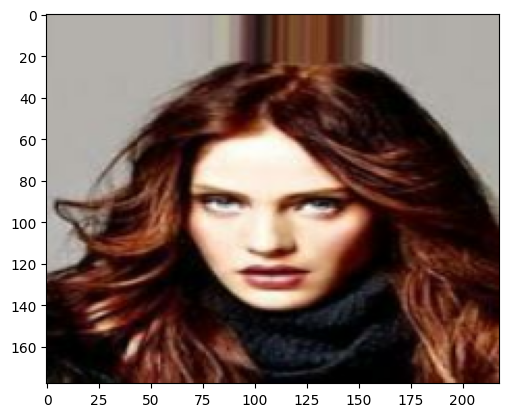

tf.Tensor([0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1], shape=(32,), dtype=int64)


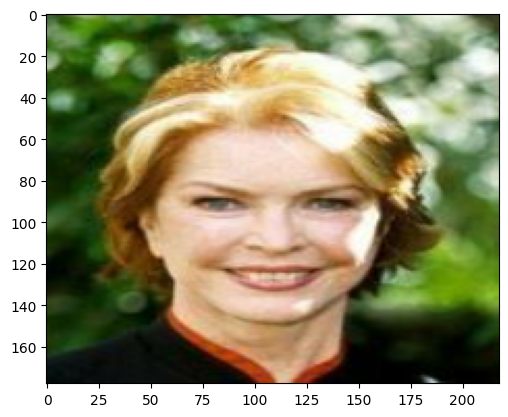

tf.Tensor([0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0], shape=(32,), dtype=int64)


In [10]:
for image, attri in labeled_images.take(2): 
    plt.imshow(image)
    plt.show()
    print(attri)

# Separamos Train/Test

In [11]:
image_count = len(labeled_images)
image_count
train_size = int(image_count * 0.9)
train = labeled_images.take(train_size)
val = labeled_images.skip(train_size)
print(tf.data.experimental.cardinality(train).numpy())
print(tf.data.experimental.cardinality(val).numpy())

182339
20260


# Modificamos los datos para el modelo

In [12]:
batch_size = 200

In [13]:
AUTOTUNE = tf.data.AUTOTUNE

def configure_for_performance(ds):
  ds = ds.shuffle(buffer_size=1000)
  ds = ds.batch(batch_size)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

train = configure_for_performance(train)
val = configure_for_performance(val)

# Creación del modelo

In [13]:

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(178,218,3)))
#model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu'))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='sigmoid'))


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 176, 216, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 88, 108, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 86, 106, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 53, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 51, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 25, 32)       0

In [16]:
model.compile(loss='BinaryCrossentropy',
              optimizer='adam',
              metrics='binary_accuracy')

In [17]:
epochs = 15
tf.compat.v1.global_variables_initializer()

reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)
history = model.fit(train, validation_data=val, epochs= epochs, callbacks=[reduce_lr])

Epoch 1/15
912/912 [==============================] - 181s 197ms/step - loss: 0.3670 - binary_accuracy: 0.8390 - val_loss: 0.3042 - val_binary_accuracy: 0.8657 - lr: 0.0010
Epoch 2/15
912/912 [==============================] - 179s 196ms/step - loss: 0.3011 - binary_accuracy: 0.8680 - val_loss: 0.2777 - val_binary_accuracy: 0.8786 - lr: 9.0000e-04
Epoch 3/15
912/912 [==============================] - 179s 196ms/step - loss: 0.2867 - binary_accuracy: 0.8746 - val_loss: 0.2690 - val_binary_accuracy: 0.8826 - lr: 8.1000e-04
Epoch 4/15
912/912 [==============================] - 179s 196ms/step - loss: 0.2793 - binary_accuracy: 0.8777 - val_loss: 0.2643 - val_binary_accuracy: 0.8849 - lr: 7.2900e-04
Epoch 5/15
912/912 [==============================] - 179s 196ms/step - loss: 0.2741 - binary_accuracy: 0.8800 - val_loss: 0.2586 - val_binary_accuracy: 0.8865 - lr: 6.5610e-04
Epoch 6/15
912/912 [==============================] - 178s 195ms/step - loss: 0.2707 - binary_accuracy: 0.8815 - val_lo

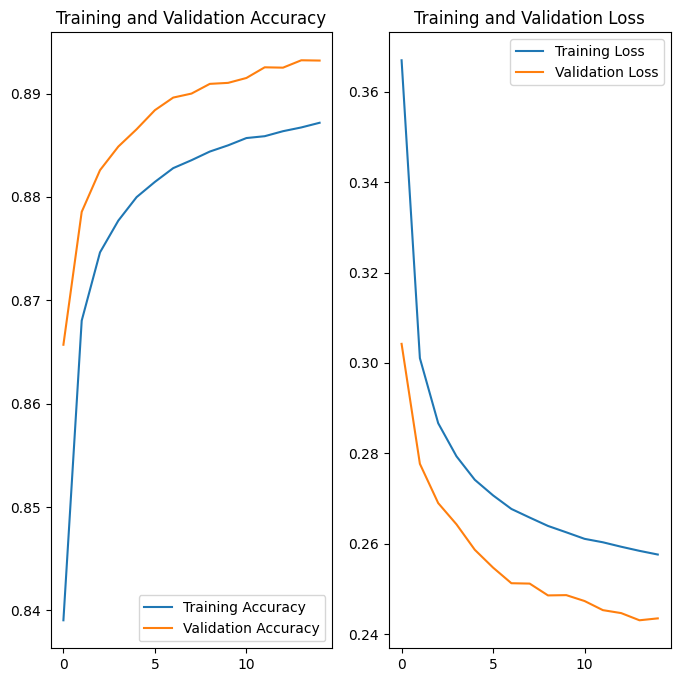

In [20]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
epochs = 10
tf.compat.v1.global_variables_initializer()

reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)
history2 = model.fit(train, validation_data=val, epochs= epochs, callbacks=[reduce_lr])

Epoch 1/10
912/912 [==============================] - 179s 196ms/step - loss: 0.2614 - binary_accuracy: 0.8855 - val_loss: 0.2459 - val_binary_accuracy: 0.8922 - lr: 0.0010
Epoch 2/10
912/912 [==============================] - 179s 196ms/step - loss: 0.2592 - binary_accuracy: 0.8865 - val_loss: 0.2430 - val_binary_accuracy: 0.8935 - lr: 9.0000e-04
Epoch 3/10
912/912 [==============================] - 180s 197ms/step - loss: 0.2573 - binary_accuracy: 0.8873 - val_loss: 0.2413 - val_binary_accuracy: 0.8939 - lr: 8.1000e-04
Epoch 4/10
912/912 [==============================] - 180s 197ms/step - loss: 0.2561 - binary_accuracy: 0.8877 - val_loss: 0.2417 - val_binary_accuracy: 0.8935 - lr: 7.2900e-04
Epoch 5/10
912/912 [==============================] - 180s 197ms/step - loss: 0.2548 - binary_accuracy: 0.8883 - val_loss: 0.2392 - val_binary_accuracy: 0.8947 - lr: 6.5610e-04
Epoch 6/10
912/912 [==============================] - 178s 196ms/step - loss: 0.2537 - binary_accuracy: 0.8889 - val_lo

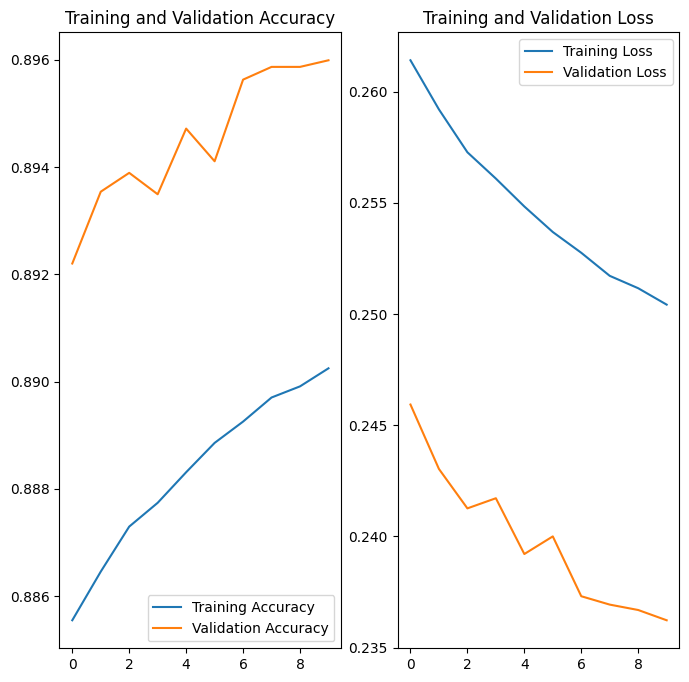

In [22]:
acc = history2.history['binary_accuracy']
val_acc = history2.history['val_binary_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [46]:
model.save('path_to_my_model.h5')

https://www.tensorflow.org/guide/keras/save_and_serialize?hl=es-419